In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('creditcard.csv')
# Display the first 5 rows of the dataset
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Extract features (X) and the target variable (y) from the dataset
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values

# Print the shape of X and the number of fraud cases in the target variable y
f"shape of X={X.shape} y={y.shape}, Fraud cases={y.sum()}"

'shape of X=(284807, 28) y=(284807,), Fraud cases=492'

In [4]:
# Import and create a logistic regression model
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
# Fit the model on the data and make predictions, then count the number of positive predictions
mod.fit(X, y).predict(X).sum()

348

In [5]:
# Add weights to the logistic regression model to handle class imbalance
mod = LogisticRegression(class_weight={0:1, 1:2})
mod.fit(X, y).predict(X).sum()

437

In [6]:
# Define a custom scoring function to calculate minimum of recall and precision
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [7]:
# Import necessary libraries for grid search and scoring
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

# Define a custom scoring function for grid search that combines precision and recall
def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

# Create a GridSearchCV object to search for the best class weights for logistic regression
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
# Fit the grid search on the data
grid.fit(X, y);

In [8]:
# Display the results of the grid search as a DataFrame
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,3.296148,0.279854,0.051512,0.008080,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.573333,1.000000,0.977273,1.000000,...,0.586907,0.629797,0.629797,0.635747,0.595023,0.627540,0.611738,0.620767,0.635492,0.048048
1,2.963293,0.152538,0.040275,0.002756,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.573333,0.952381,0.956522,1.000000,...,0.677201,0.702032,0.704289,0.708145,0.671946,0.697517,0.690745,0.706546,0.706181,0.029138
2,2.753706,0.204388,0.041600,0.003709,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.584416,0.954545,0.957447,1.000000,...,0.733634,0.747178,0.744921,0.769231,0.728507,0.744921,0.749436,0.762980,0.751354,0.018541
3,2.780337,0.121338,0.042388,0.001333,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.569620,0.954545,0.957447,1.000000,...,0.747178,0.772009,0.774266,0.780543,0.746606,0.765237,0.760722,0.774266,0.768065,0.014912
4,2.748187,0.132920,0.042016,0.000996,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.562500,0.920000,0.957447,1.000000,...,0.760722,0.785553,0.776524,0.787330,0.760181,0.774266,0.769752,0.785553,0.777324,0.012158
5,2.782677,0.187319,0.042497,0.003210,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.562500,0.923077,0.958333,1.000000,...,0.769752,0.792325,0.792325,0.798643,0.769231,0.787810,0.785553,0.799097,0.787939,0.011213
6,2.724265,0.166637,0.041338,0.004606,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.562500,0.928571,0.958333,1.000000,...,0.781038,0.795964,0.799550,0.805430,0.782805,0.794582,0.794582,0.812641,0.795576,0.009725
7,2.765829,0.201543,0.041510,0.001284,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.542169,0.928571,0.958333,0.969697,...,0.785553,0.790287,0.793333,0.812217,0.789593,0.805869,0.794643,0.813483,0.798092,0.010140
8,2.661472,0.138541,0.042032,0.003641,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.542169,0.928571,0.958333,0.970588,...,0.785235,0.784314,0.792952,0.821267,0.794118,0.804494,0.792873,0.808463,0.798464,0.011476
9,2.644641,0.176218,0.041709,0.001677,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.542169,0.928571,0.938776,0.970588,...,0.783964,0.781857,0.790393,0.822072,0.787472,0.792035,0.793792,0.807095,0.795573,0.012509


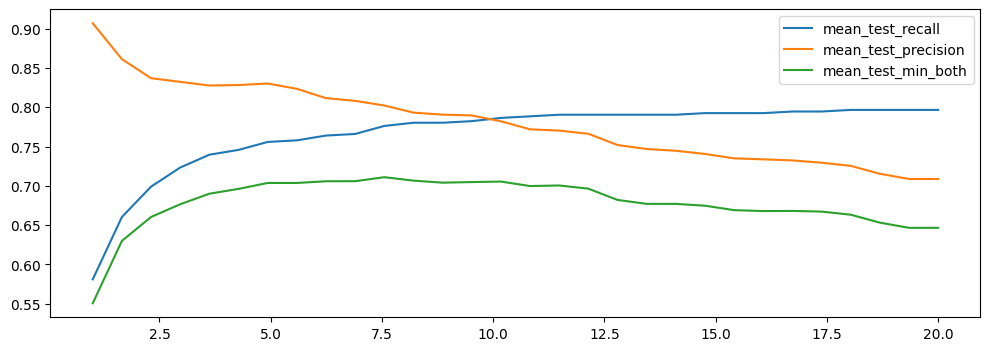

In [9]:
# Summary for the test metrics
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
# Plot the test metrics for recall, precision, and custom scoring
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend();

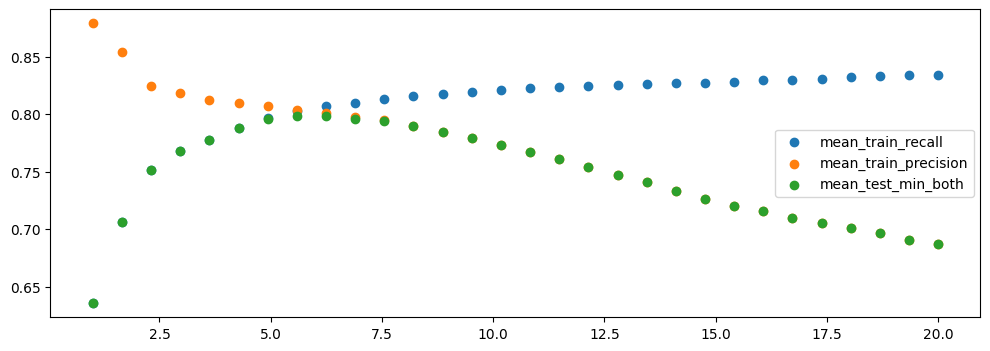

In [10]:
# Summary for the train metrics
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
# Plot the train metrics for recall, precision, and custom scoring
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend();